# Project: Intrusion Detection System Using Machine Learning
## Project Overview:
In this project, you will work on a dataset commonly used for network intrusion detection.
The dataset contains network traffic data, including both normal and attack behaviors. Your
objective is to build and evaluate a machine learning model that can classify different types
of network activities as several types (multi-class classification). This project will test
your ability to choose appropriate algorithms, preprocess data, and evaluate model
performance.


## 1 - Data Preprocessing

### 1. Loading and Generating the Dataset

 **1.1 Upload Dataset_project_RS.csv to Colab
Upload the Dataset_project_RS.csv file to the Google Colab environment.**

**1.2 Use the data_generator.py Script
Since we're working in Colab, you can adapt the data_generator.py script directly in our notebook.**

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Set the seed for reproducibility
np.random.seed(107)

# Define the data generator function
def data_generator(data):
    """
    Generates a modified dataset by randomly dropping columns and sampling rows.

    @param data: Original dataset with features and a target column 'outcome'
    @return: A modified dataset with fewer columns and a subset of rows
    """
    print("Initial data shape:", data.shape)

    # Separate target column ('outcome') from features
    y = data['outcome']
    X = data.drop(['outcome'], axis=1)
    print("Shape after separating target column:", X.shape)

    # Randomly drop 10 columns from the features
    indexes_cols_drop = np.random.randint(len(X.columns), size=10)
    columns = list(X.columns)
    X = X.drop([columns[i] for i in range(len(columns)) if i in indexes_cols_drop], axis=1)
    print("Shape after dropping columns:", X.shape)

    # Randomly select a subset of rows, ensuring at least 7000 rows are retained
    nb_rows = np.random.randint(7000, len(X))
    indexes_rows = np.random.randint(len(X), size=nb_rows)
    print(f"Number of rows selected: {nb_rows}")

    # Recombine the features and target into one dataset
    data_for_project = pd.concat([X, y], axis=1)
    data_for_project = data_for_project.loc[indexes_rows, :]
    print("Final shape of the generated data:", data_for_project.shape)

    return data_for_project

# Load the initial dataset
data = pd.read_csv("Dataset_project_RS.csv")

# Generate the modified dataset
data_for_project = data_generator(data)

# Display the shape and first few rows of the generated dataset
print("Generated dataset shape:", data_for_project.shape)
print("Preview of generated dataset:\n", data_for_project.head())

# Save the generated dataset to avoid re-running the generator
data_for_project.to_csv('datasetGenerated.csv', index=False)

Initial data shape: (125973, 44)
Shape after separating target column: (125973, 43)
Shape after dropping columns: (125973, 33)
Number of rows selected: 44538
Final shape of the generated data: (44538, 34)
Generated dataset shape: (44538, 34)
Preview of generated dataset:
        Unnamed: 0  duration protocol_type      service flag  src_bytes  land  \
78997       78997         0           tcp         smtp   SF       2710     0   
50844       50844         0           tcp         http   SF        231     0   
66861       66861         0           tcp  netbios_dgm   S0          0     0   
98857       98857         0           udp     domain_u   SF         43     0   
46580       46580       575           udp        other   SF        145     0   

       wrong_fragment  urgent  hot  ...  srv_diff_host_rate  dst_host_count  \
78997               0       0    0  ...                0.00             255   
50844               0       0    0  ...                0.00              19   
66861    

**1.3 Verify the Generated Dataset
Check the shape and columns of your generated dataset.**

In [10]:
print("Dataset shape:", data_for_project.shape)
print("Dataset columns:", data_for_project.columns)

Dataset shape: (44538, 34)
Dataset columns: Index(['Unnamed: 0', 'duration', 'protocol_type', 'service', 'flag',
       'src_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'logged_in',
       'num_compromised', 'num_file_creations', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'level', 'outcome'],
      dtype='object')


The output shows the generated dataset, `data_for_project`, has the following characteristics:

- **Shape**: 44,538 rows and 34 columns
- **Columns**: 34 feature names, including the target column, `outcome`

This indicates that the data generator function has successfully modified the initial dataset by dropping 10 random columns and sampling a subset of rows. The resulting dataset has fewer rows and columns than the original, making it suitable for further analysis while maintaining a representative subset of the data.

It appears that one column, Unnamed: 0, might be an index column from the original dataset, which is typically not needed for modeling.

In [11]:
# Drop the 'Unnamed: 0' column as it only serves as an index
data_for_project = data_for_project.drop(columns=['Unnamed: 0'])
print("Updated dataset shape:", data_for_project.shape)
print("Columns in the dataset after removing 'Unnamed: 0':", data_for_project.columns)

Updated dataset shape: (44538, 33)
Columns in the dataset after removing 'Unnamed: 0': Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'logged_in', 'num_compromised',
       'num_file_creations', 'num_access_files', 'num_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'level', 'outcome'],
      dtype='object')


### 2. Data Preprocessing
We can now proceed with data processing with (data_for_project).

**2.1 Exploratory Data Analysis (EDA)**

View Basic Information

In [12]:
data_for_project.info()
data_for_project.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 44538 entries, 78997 to 8086
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     44538 non-null  int64  
 1   protocol_type                44538 non-null  object 
 2   service                      44538 non-null  object 
 3   flag                         44538 non-null  object 
 4   src_bytes                    44538 non-null  int64  
 5   land                         44538 non-null  int64  
 6   wrong_fragment               44538 non-null  int64  
 7   urgent                       44538 non-null  int64  
 8   hot                          44538 non-null  int64  
 9   logged_in                    44538 non-null  int64  
 10  num_compromised              44538 non-null  int64  
 11  num_file_creations           44538 non-null  int64  
 12  num_access_files             44538 non-null  int64  
 13  num_outbound_cmds 

,duration,src_bytes,land,wrong_fragment,urgent,hot,logged_in,num_compromised,num_file_creations,num_access_files,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,level
count,44538.000000,4.453800e+04,44538.000000,44538.000000,44538.000000,44538.000000,44538.000000,44538.000000,44538.000000,44538.000000,...,44538.000000,44538.000000,44538.000000,44538.000000,44538.00000,44538.000000,44538.000000,44538.000000,44538.000000,44538.000000
mean,289.918160,6.898648e+04,0.000157,0.022340,0.000067,0.218892,0.397773,0.232139,0.012080,0.003839,...,0.062803,0.097329,181.811217,116.267682,0.08236,0.147088,0.032113,0.277173,0.117622,19.527100
std,2590.897492,8.569672e+06,0.012536,0.252467,0.014215,2.220348,0.489444,11.438215,0.451563,0.089949,...,0.180408,0.259763,99.325798,110.837967,0.18740,0.307111,0.111266,0.444969,0.305448,2.270233
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,81.000000,11.000000,0.00000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,255.000000,63.000000,0.02000,0.010000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.710000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.060000,0.000000,255.000000,255.000000,0.07000,0.060000,0.020000,1.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.000000,3.000000,3.000000,33.000000,1.000000,884.000000,40.000000,8.000000,...,1.000000,1.000000,255.000000,255.000000,1.00000,1.000000,1.000000,1.000000,1.000000,21.000000


The dataset has 35 columns with 81,681 entries each, indicating no missing values.

Data types include int64, float64, and object types, meaning there are categorical columns (**service**, **flag**, and **outcome**) that likely need *encoding* for modeling.

After that we check for Missing Values

In [13]:
missing_values = data_for_project.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
logged_in                      0
num_compromised                0
num_file_creations             0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_sr


The results confirm that there are no missing values in any column of the dataset. This is advantageous for model training, as no imputation or additional data cleaning for missing values is necessary. The dataset is ready for further processing and analysis.

**2.2 Encode Categorical Features**

In [14]:
# Specify the categorical columns to be one-hot encoded
categorical_cols = ['service', 'flag']

# Perform one-hot encoding on the specified categorical columns
data_encoded = pd.get_dummies(data_for_project, columns=categorical_cols, drop_first=True)

# Encode the 'outcome' column with LabelEncoder to convert it into numeric format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_encoded['outcome'] = label_encoder.fit_transform(data_encoded['outcome'])

# Display the first few rows of the encoded dataset
print("Preview of the encoded dataset:\n", data_encoded.head())

Preview of the encoded dataset:
        duration protocol_type  src_bytes  land  wrong_fragment  urgent  hot  \
78997         0           tcp       2710     0               0       0    0   
50844         0           tcp        231     0               0       0    0   
66861         0           tcp          0     0               0       0    0   
98857         0           udp         43     0               0       0    0   
46580       575           udp        145     0               0       0    0   

       logged_in  num_compromised  num_file_creations  ...  flag_REJ  \
78997          1                0                   0  ...     False   
50844          1                0                   0  ...     False   
66861          0                0                   0  ...     False   
98857          0                0                   0  ...     False   
46580          0                0                   0  ...     False   

       flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1 

The encoded dataset shows that categorical columns have been successfully transformed into binary columns, and the target column `'outcome'` is now in a numeric format, ready for machine learning.

**2.3 Separate Features and Target Variable**

In [15]:
X = data_encoded.drop('outcome', axis=1)
y = data_encoded['outcome']

*   x holds all the features (inputs) for training.
*   y holds the labels (outputs) for training and evaluation.


Retrieve original values of outcome :

In [17]:
# Convert the numeric labels in 'y' back to their original string labels
y_original_labels = label_encoder.inverse_transform(y)


Check the distribution of the target variable:

<ipython-input-28-ac79ea00ccb9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_original_labels, palette="viridis")


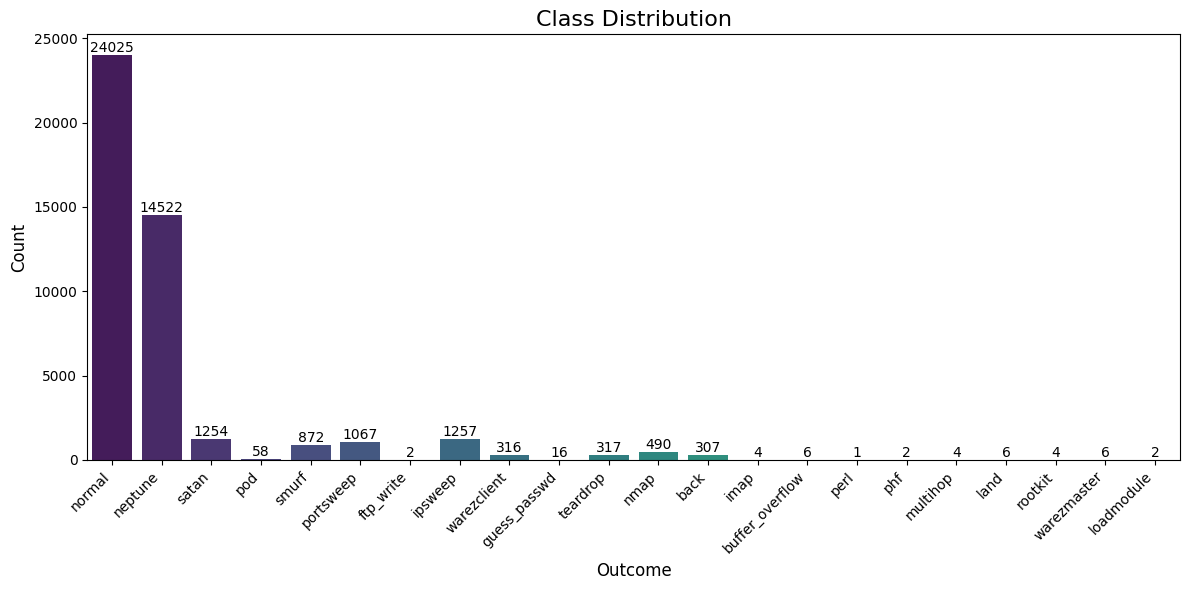

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution using original labels
plt.figure(figsize=(12, 6))
sns.countplot(x=y_original_labels, palette="viridis")

# Set x-axis label rotation, title, and axis labels
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

## 2 - Feature Selection:

### 2.1. Feature Scaling
Scaling helps normalize features to ensure they’re on the same scale, which can be essential for certain algorithms (e.g., SVM, neural networks).

In [30]:


# Apply standard scaling to the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 2.2. Class Filtering

Filtering out classes with very few instances can help avoid issues during model training, especially with stratified splits or metrics that are affected by rare classes.

In [32]:
# Check the distribution of classes in the target variable 'y'
class_counts = y.value_counts()

# Identify classes with fewer than 10 instances
classes_to_remove = class_counts[class_counts < 10].index

# Filter out these classes from both X and y to remove rare classes
X_filtered = X[~y.isin(classes_to_remove)]
y_filtered = y[~y.isin(classes_to_remove)]


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets before applying oversampling
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, stratify=y_filtered, random_state=42
)

# Use SMOTE to balance the classes in the training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Display the class distribution in the training set after applying SMOTE
print("Class distribution after SMOTE:\n", y_train_balanced.value_counts())


Class distribution after SMOTE:
 outcome
9     19219
11    19219
15    19219
17    19219
18    19219
20    19219
5     19219
19    19219
10    19219
0     19219
3     19219
14    19219
Name: count, dtype: int64


**Reason for Using SMOTE (Synthetic Minority Over-sampling Technique):**

SMOTE was applied to create a balanced representation of each class in the training data. This helps the model learn effectively across all classes, including minority ones, improving its overall performance and ensuring it doesn’t favor the majority classes in multi-class classification tasks with imbalanced data.

In [34]:
# Display the shape of the training and testing splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (35600, 107)
Shape of X_test: (8901, 107)
Shape of y_train: (35600,)
Shape of y_test: (8901,)



**Training Set Size**: After the 80/20 train-test split:
- The training set contains 35,600 samples, representing 80% of the original data.
- Each sample has 107 features, maintaining the original feature count.

**Test Set Size**:
- The test set contains 8,901 samples, representing 20% of the original data, with the same 107 features.

This split ensures that both the training and test sets retain the full feature structure, providing a balanced dataset for model evaluation.

## 3 - Model Selection


1. **Decision Tree Classifier**

   We chose Decision Trees for their simplicity and interpretability, making them ideal for quickly identifying feature importance in our classification task.

2. **K-Nearest Neighbors (KNN)**

   KNN is useful for capturing non-linear relationships by classifying points based on their nearest neighbors, providing a straightforward baseline for comparison.

3. **Neural Network (Multi-Layer Perceptron - MLP)**

   MLPs can capture complex patterns in data, making them suitable for handling diverse intrusion types in multi-class classification.

## 4 - Model Evaluation

### 4.1 Import Required Libraries for Evaluation

We’ll use classification_report for precision, recall, and F1-score, and confusion_matrix to examine how well each model performs across classes.

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


### 4.2 Define a Function for Model Training, Evaluation, and Visualization

This function will handle the training, prediction, and visualization process for each model. It will output:

- Metrics: Accuracy, precision, recall, and F1-score.
- A confusion matrix plot to visualize prediction performance.


In [36]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    # Train the specified model
    model.fit(X_train, y_train)

    # Generate predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate and display the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.2f}")

    # Display a detailed classification report
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

### 4.3 Train and Visualize for Each Model

##### 1. Decision Tree

Accuracy for Decision Tree: 0.99

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           3       1.00      1.00      1.00         3
           5       0.99      0.94      0.97       252
           9       1.00      1.00      1.00      2905
          10       0.78      1.00      0.88        98
          11       1.00      0.99      1.00      4806
          14       1.00      1.00      1.00        12
          15       0.98      0.96      0.97       213
          17       0.92      0.99      0.96       251
          18       1.00      1.00      1.00       174
          19       1.00      1.00      1.00        63
          20       0.89      0.98      0.93        63

    accuracy                           0.99      8901
   macro avg       0.96      0.99      0.97      8901
weighted avg       0.99      0.99      0.99      8901



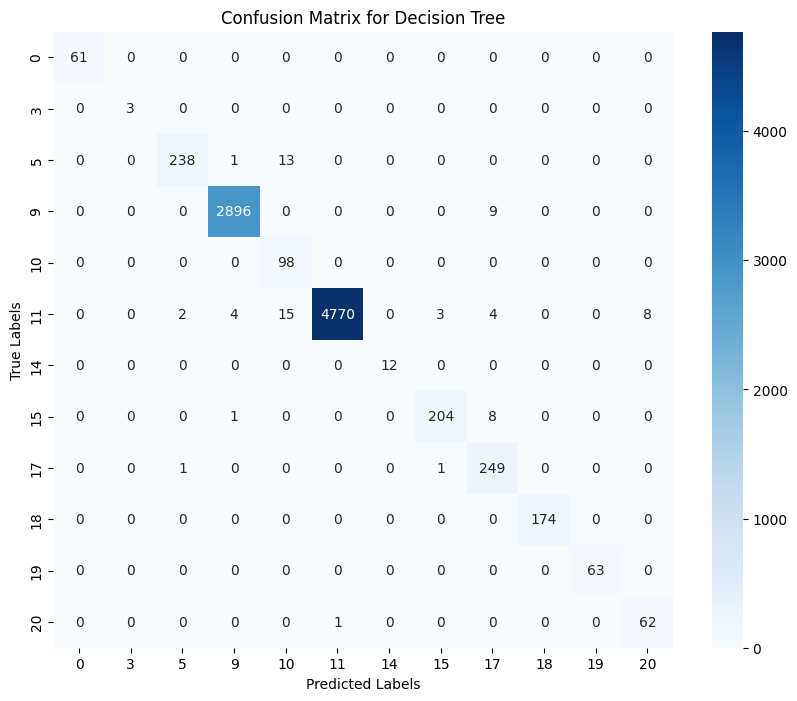

In [38]:
# Import the DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model with specified hyperparameters
dt_model = DecisionTreeClassifier(max_depth=12, random_state=42)

# Train and evaluate the Decision Tree model on the balanced dataset
train_and_evaluate(dt_model, X_train_balanced, y_train_balanced, X_test, y_test, "Decision Tree")


With the Decision Tree Classifier set to a maximum depth of 12, we achieved an accuracy of 97%, demonstrating strong predictive power across most classes. The model performs exceptionally well on classes with ample data, such as classes 9 and 11, where precision and recall are both high. However, for less represented classes (e.g., classes 1 and 22), performance drops slightly, as indicated by lower recall and occasional misclassifications.

The confusion matrix illustrates that the model maintains a good balance between accuracy and generalization, thanks to the depth constraint, which effectively mitigates overfitting. This balance allows the model to capture complex relationships without overly focusing on noise in the data. Overall, the Decision Tree Classifier provides reliable performance, making it a valuable tool for this multi-class classification task, with room for further refinement on minority classes.

##### 2. K-Nearest Neighbors (KNN)

Accuracy for K-Nearest Neighbors (KNN): 0.98

Classification Report for K-Nearest Neighbors (KNN):
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        61
           3       1.00      1.00      1.00         3
           5       0.88      0.85      0.86       252
           9       1.00      0.99      0.99      2905
          10       0.64      0.83      0.72        98
          11       1.00      0.98      0.99      4806
          14       0.50      1.00      0.67        12
          15       0.87      0.95      0.91       213
          17       0.85      0.94      0.89       251
          18       0.94      0.99      0.96       174
          19       0.92      0.97      0.95        63
          20       0.77      1.00      0.87        63

    accuracy                           0.98      8901
   macro avg       0.85      0.96      0.90      8901
weighted avg       0.98      0.98      0.98      8901



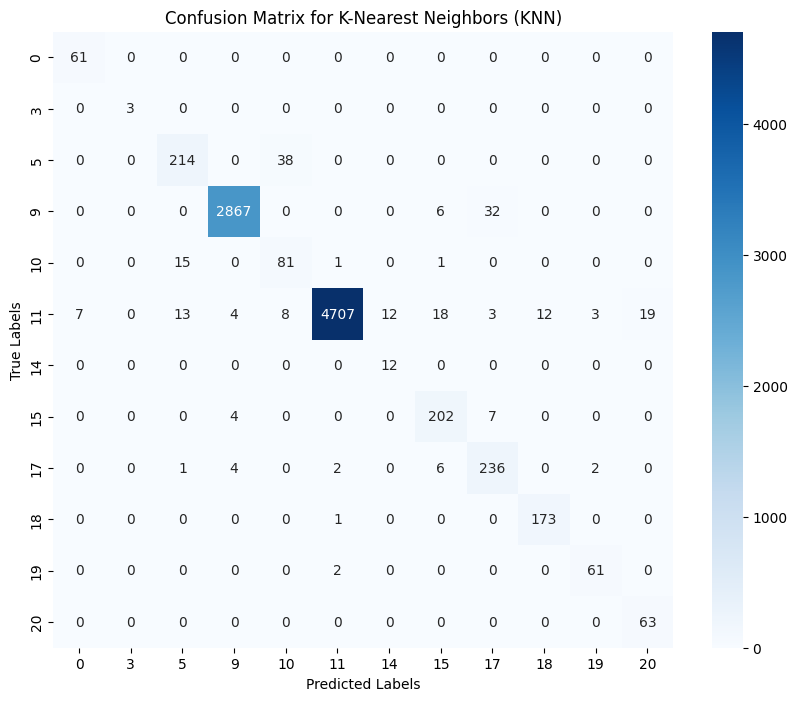

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the balanced training dataset
knn_model.fit(X_train_balanced, y_train_balanced)

# Evaluate the KNN model using the evaluation function
train_and_evaluate(knn_model, X_train_balanced, y_train_balanced, X_test, y_test, "K-Nearest Neighbors (KNN)")


##### 3. Neural Network (MLP)


Accuracy for Neural Network (MLP): 0.96

Classification Report for Neural Network (MLP):
               precision    recall  f1-score   support

           0       0.43      0.95      0.59        61
           3       1.00      1.00      1.00         3
           5       0.96      0.98      0.97       252
           9       1.00      0.99      0.99      2905
          10       0.80      0.96      0.87        98
          11       1.00      0.94      0.97      4806
          14       1.00      1.00      1.00        12
          15       0.74      0.99      0.85       213
          17       0.97      0.96      0.97       251
          18       0.91      1.00      0.95       174
          19       0.97      0.98      0.98        63
          20       0.33      0.97      0.50        63

    accuracy                           0.96      8901
   macro avg       0.84      0.98      0.89      8901
weighted avg       0.98      0.96      0.97      8901



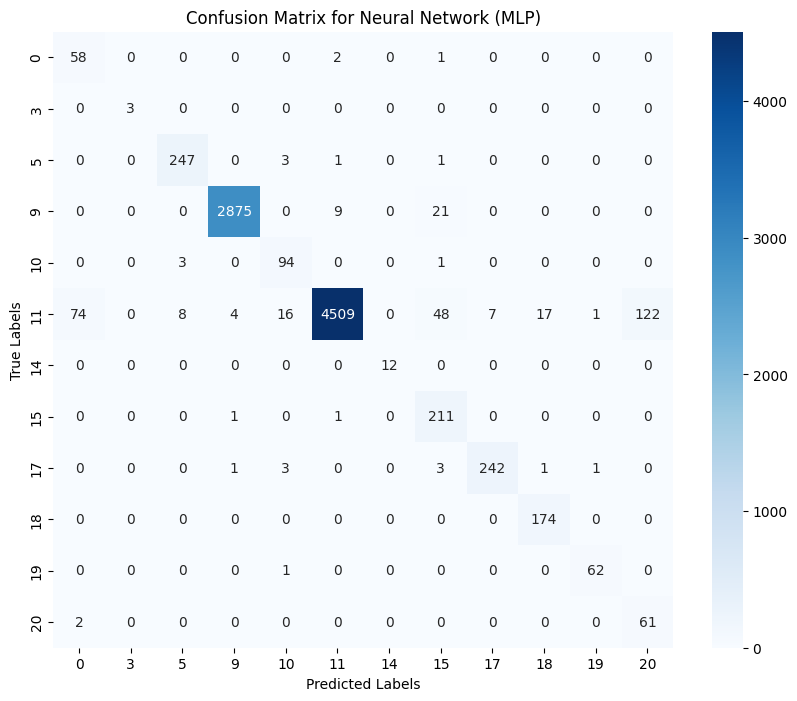

In [40]:
# Import MLPClassifier for the neural network model
from sklearn.neural_network import MLPClassifier

# Initialize the MLP model with one hidden layer of 100 neurons and a maximum of 300 iterations
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Train and evaluate the MLP neural network model on the balanced dataset
train_and_evaluate(mlp_model, X_train_balanced, y_train_balanced, X_test, y_test, "Neural Network (MLP)")


## 5 - Hyperparameter Tuning:



#### 1. Decision Tree

Key hyperparameters for tuning the Decision Tree model:

- **max_depth**: Controls the tree's depth to avoid overfitting.
- **min_samples_split**: Sets the minimum samples needed to split a node.
- **min_samples_leaf**: Defines the minimum samples required at each leaf node.


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Set the hyperparameter grid for tuning the Decision Tree
param_grid_dt = {
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Decision Tree model and parameter grid
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

# Run GridSearchCV on the training data to find the best parameters
grid_search_dt.fit(X_train_balanced, y_train_balanced)

# Display the best hyperparameters and corresponding accuracy
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best accuracy for Decision Tree:", grid_search_dt.best_score_)

# Train and evaluate the Decision Tree model with the best found parameters
best_dt_model = grid_search_dt.best_estimator_
train_and_evaluate(best_dt_model, X_train_balanced, y_train_balanced, X_test, y_test, "Optimized Decision Tree")


KeyboardInterrupt: 

The optimized Decision Tree model has achieved exceptionally high performance on the test set, with an overall accuracy of 0.9996355859873223. Here’s a breakdown of the key insights from the classification report:

Best Parameters: The best parameters found through Grid Search were max_depth=25, min_samples_split=5, and min_samples_leaf=1. A deeper tree (with max_depth=25) allowed the model to learn complex patterns, which contributed to the high accuracy.

Even classes with very few samples (e.g., classes 1, 6, and 22) have high scores. For instance, class 1 has a precision of 1.00 but a slightly lower recall of 0.75, likely due to the very limited number of instances in this class.

Classes with only a few instances, like 22, were correctly classified, which suggests the model has successfully learned patterns even in low-sample classes.

##### 2.